\begin{align}
\Huge \text{Tarea 1} \notag
\end{align}

\begin{align}
\textbf{Teoría de Perturbaciones Cosmológicas - Dr. Alejandro Avilés}\notag \\ 
\end{align}

\begin{align}
\text{Enero - Junio 2025}\notag \\
\end{align}

\begin{align}
\text{Holman Daniel Quintero Salazar}\notag
\end{align}

\begin{align}
\textbf{hd.quinterosalazar@ugto.mx - github.com/hol1m4n}\notag
\end{align}

\begin{align}
\textbf{11/03/25}\notag
\end{align}

# Librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.interpolate import interp1d
from scipy.special import spherical_jn
import pandas as pd
import re

# Ejercicio #3
## Neutrinos masivos
#### Código que calcula el cociente entre la densidad de neutrinos y la densidad de fotónes en función del factor de escala
(Todas las unidades están en eV)

/tmp/ipykernel_13220/725695791.py:11: RuntimeWarning: overflow encountered in exp
  return q**2 * term / (np.exp(q) + 1)


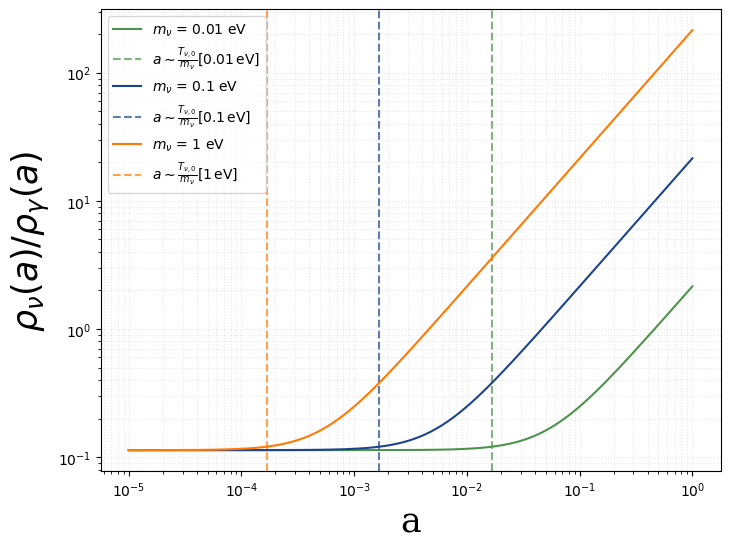

In [2]:
T_gamma0 = 2.725 * 8.617e-5 # Temperatura del CMB a z=0 (K * Factor de convsersión a eV)
T_nu0 = (4/11)**(1/3) * T_gamma0   # Temperatura de los neutrinos a z = 0


def rho_gamma(a): # Densidad de fotones en función del factor de escala
    # T_gamma(a) = T_gamma0/a
    return (np.pi**2 / 15) * (T_gamma0 / a)**4
    
def neutrino_integrand(q, a,m_nu): # Integrando de densidad de energía de neutrinos
    term = np.sqrt(q**2 + (m_nu * a / T_nu0)**2)
    return q**2 * term / (np.exp(q) + 1)

def rho_nu(a,m_nu): # Densidad de neutrinos en función del factor de escala y la masa
    # Calcula la integral sobre q de 0 a infinito.
    integral, _ = quad(neutrino_integrand, 0, np.inf, args=(a,m_nu))
    return (T_nu0**4 / (2 * np.pi**2 * a**4)) * integral

# Valores de factor de escala (separados logarítmicamente)


nu_masses = [0.01,0.1,1] # Masa de los neutrinos en eV
nu_color = ['#4C934C','#1C448E','#ff7904']



# Gráfica
# Computo del cociente entre fotones y neutrinos
plt.figure(figsize=(8, 6))

a_vals = np.logspace(-5, 0, 100)
for count in range(len(nu_masses)):
    ratio = np.array([rho_nu(a,nu_masses[count]) / rho_gamma(a) for a in a_vals])

    
    plt.loglog(a_vals, ratio, label=fr'$m_\nu$ = {nu_masses[count]} eV', color=nu_color[count])
    plt.axvline(x=T_nu0/nu_masses[count],
            color=nu_color[count],
            linestyle='--',
            label=fr"$a \sim \frac{{T_{{\nu,0}}}}{{m_\nu}} [ {nu_masses[count]}\,\mathrm{{eV}}$]",
            alpha=0.7)
    
plt.xlabel("a", style = 'normal', family = 'serif', size = 25)
plt.ylabel(r"$\rho_\nu(a)/\rho_\gamma(a)$", style = 'normal', family = 'serif', size = 25)
#plt.title(r"Log-Log Plot of $\rho_\nu(a)/\rho_\gamma(a)$ for $m_\nu=1\,\mathrm{eV}$")

plt.legend()
plt.grid(True, which="both", ls=":", alpha=0.3)
plt.savefig('Photon-neutrino ratio', bbox_inches='tight', transparent=True,dpi=200)
plt.show()


# Ejercicio #5
## Espectros de potencia a partir de CLASS

Found z value: 50.0
Found z value: 10.0
Found z value: 5.0
Found z value: 1.0
Found z value: 0.0


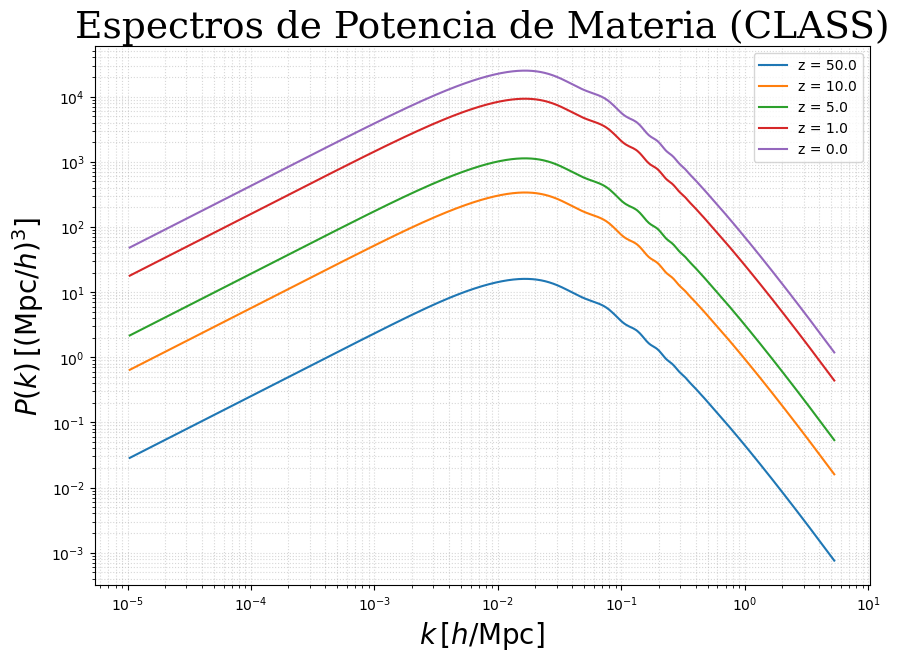

In [3]:
filenames = [
    'TPC1_300_z1_pk.dat',
    'TPC1_300_z2_pk.dat',
    'TPC1_300_z3_pk.dat',
    'TPC1_300_z4_pk.dat',
    'TPC1_300_z5_pk.dat'
]
plt.figure(figsize=(10, 7))
for fname in filenames:
    pattern = re.compile(r'z\s*=\s*([-\d\.]+)', re.IGNORECASE)
    with open(fname, 'r') as f:
        for line in f:
            if line.startswith('#'):
                match = pattern.search(line)
                if match:
                    z_value = float(match.group(1))
                    print("Found z value:", z_value) 
    data = np.loadtxt(fname)
    k = data[:, 0]
    pk = data[:, 1]
    plt.loglog(k, pk, label=f'z = {z_value}')


plt.xlabel(r'$k \, [h/\mathrm{Mpc}]$', style = 'normal', family = 'serif', size = 20)
plt.ylabel(r'$P(k) \, [(\mathrm{Mpc}/h)^3]$', style = 'normal', family = 'serif', size = 20)
plt.title('Espectros de Potencia de Materia (CLASS)', style = 'normal', family = 'serif', size = 27)
plt.legend()
plt.grid(True, which='both', ls=':', alpha=0.5)
plt.savefig('MPS', bbox_inches='tight', transparent=True,dpi=200)
plt.show()

### Función de crecimiento lineal

Función reportada en https://arxiv.org/pdf/1208.5931

Algunos valores de D_+(z):
z = 0.00, D_+(z) = 1.0000
z = 1.26, D_+(z) = 0.5454
z = 2.51, D_+(z) = 0.3585
z = 3.77, D_+(z) = 0.2654
z = 5.00, D_+(z) = 0.2113


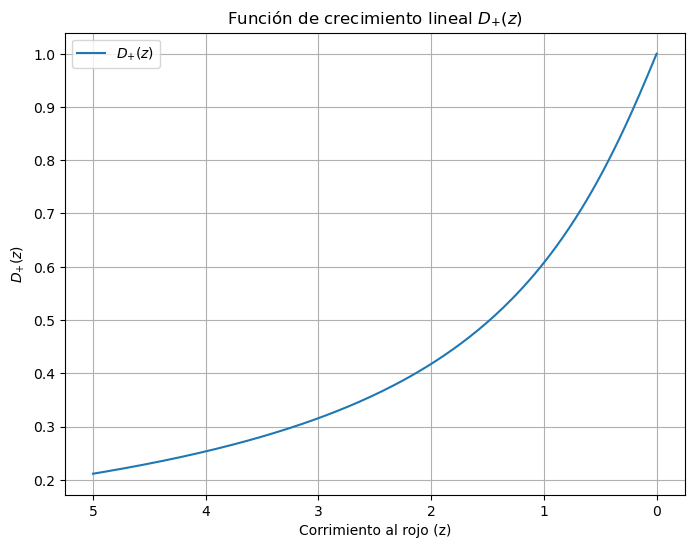

In [4]:
Omega_m0 = 0.3153         
Omega_lambda0 = 0.6847   
H0 = 67.36              

def E(z):
    return np.sqrt(Omega_m0 * (1+z)**3 + Omega_lambda0)

def Omega_m_z(z):
    return Omega_m0 * (1+z)**3 / E(z)**2

def Omega_lambda_z(z):
    return Omega_lambda0 / E(z)**2

def g_z(z):
    Omz = Omega_m_z(z)
    Olz = Omega_lambda_z(z)
    numerador = Omz
    denominador = (Omz**(4.0/7.0)
                   - Olz
                   + (1.0 + 0.5*Omz) * (1.0 + Olz/70.0))
    return numerador / denominador
g0 = g_z(0.0)
def D_plusF(z):
    return (1.0/(1.0+z)) * (g_z(z)/g0)
if __name__ == "__main__":
    z_vals = np.linspace(0, 5, 200)
    D_vals = [D_plusF(z) for z in z_vals]
    print("Algunos valores de D_+(z):")
    for i in [0, 50, 100, 150, 199]:
        print(f"z = {z_vals[i]:.2f}, D_+(z) = {D_vals[i]:.4f}")
    plt.figure(figsize=(8,6))
    plt.plot(z_vals, D_vals, label=r'$D_{+}(z)$')
    plt.xlabel('Corrimiento al rojo (z)')
    plt.ylabel(r'$D_{+}(z)$')
    plt.title('Función de crecimiento lineal $D_{+}(z)$')
    plt.grid(True)
    plt.legend()
    plt.gca().invert_xaxis()
    plt.show()


Función numérica

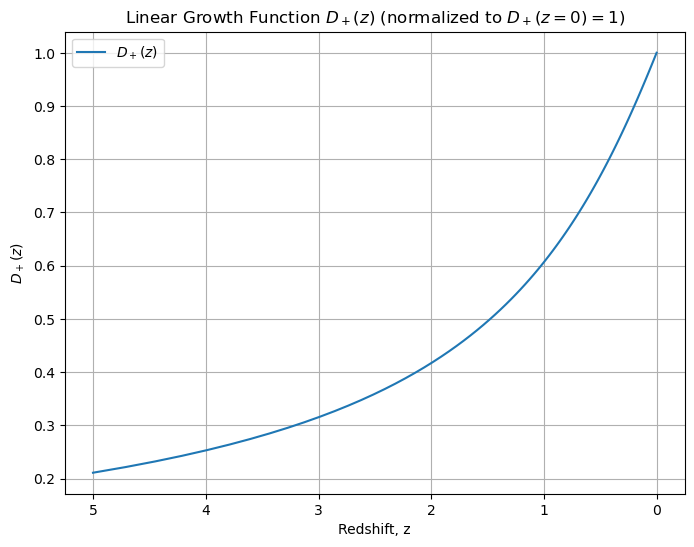

In [5]:
H0 = 67.36  # km/s/Mpc
Omega_m0 = 0.3153
Omega_L0 = 0.6847

def H(a):
    return H0 * np.sqrt(Omega_m0 / a**3 + Omega_L0)
def integrand(a_prime):
    return 1.0 / (a_prime * H(a_prime))**3

def D_plus_unnorm(a):
    prefactor = 5.0 * Omega_m0 * H0**2 / 2.0
    integral, err = quad(integrand, 0, a)
    return prefactor * H(a) * integral

D_norm = D_plus_unnorm(1.0)

def D_plusN(a):
    return D_plus_unnorm(a) / D_norm

a_vals = np.linspace(0.1666, 1.0, 100)
z_vals = 1/a_vals - 1
D_vals = np.array([D_plusN(a) for a in a_vals])

plt.figure(figsize=(8,6))
plt.plot(z_vals, D_vals, label=r'$D_+(z)$')
plt.xlabel('Redshift, z')
plt.ylabel(r'$D_+(z)$')
plt.title('Linear Growth Function $D_+(z)$ (normalized to $D_+(z=0)=1$)')
plt.gca().invert_xaxis() 
plt.legend()
plt.grid(True)
plt.show()

Found z value: 50.0
Found z value: 10.0
Found z value: 5.0
Found z value: 1.0


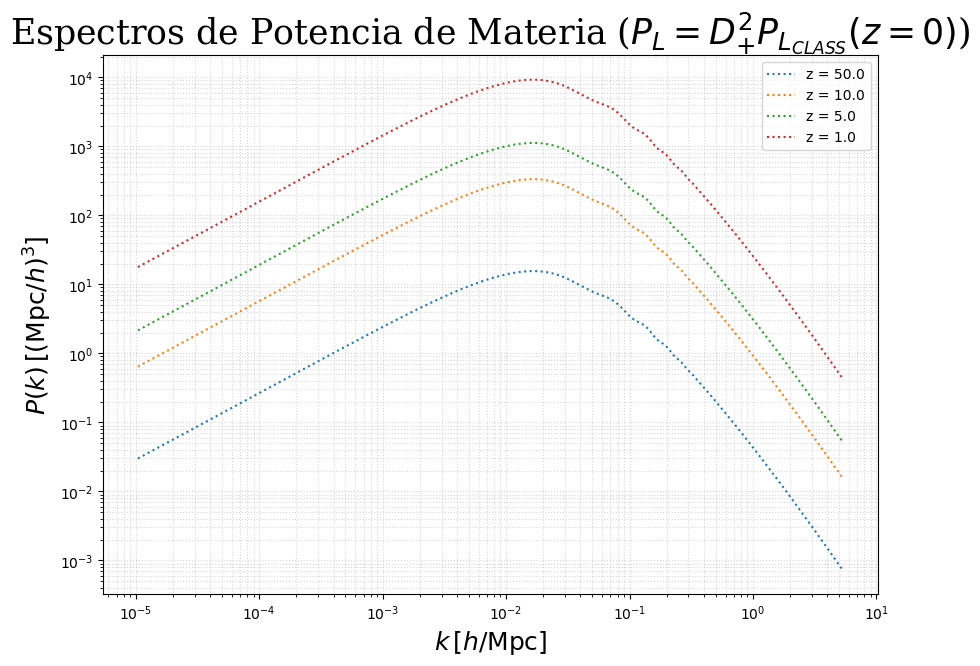

In [6]:
filenames = [
    'TPC1_300_z1_pk.dat',
    'TPC1_300_z2_pk.dat',
    'TPC1_300_z3_pk.dat',
    'TPC1_300_z4_pk.dat',
    'TPC1_300_z5_pk.dat'
]

data_0 = np.loadtxt(filenames[4])
k_0 = data_0[:, 0]
pk_0 = data_0[:, 1]

plt.figure(figsize=(10, 7))
for fname in filenames[0:4]:
    pattern = re.compile(r'z\s*=\s*([-\d\.]+)', re.IGNORECASE)
    with open(fname, 'r') as f:
        for line in f:
            if line.startswith('#'):
                # Look for the z value in the line
                match = pattern.search(line)
                if match:
                    # Convert the found value to float (or int if appropriate)
                    z_value = float(match.group(1))
                    print("Found z value:", z_value)
                    
    data = np.loadtxt(fname)
    k = data[:, 0]
    pk = data[:, 1]
    
    z_R = z_value
    a_scale = 1/(1+z_R)

    new_pkN = (D_plusN(a_scale)**2) * pk_0
    new_pkF = (D_plusF(z_R)**2) * pk_0

    plt.loglog(k, new_pkN, label=f'z = {z_value}',linestyle=':')
    #plt.loglog(k, new_pkF, label=f'z = {z_value} Knobel2012',linestyle='--')



    
    #z_value = fname.split('_z')[1].split('_')[0]

    
plt.xlabel(r'$k \, [h/\mathrm{Mpc}]$', style = 'normal', family = 'serif', size = 18)
plt.ylabel(r'$P(k) \, [(\mathrm{Mpc}/h)^3]$', style = 'normal', family = 'serif', size = 18)
plt.title(r'Espectros de Potencia de Materia ($P_L=D_{+}^{2}P_{L_{CLASS}}(z=0)$)', style = 'normal', family = 'serif', size = 25)
plt.legend()
plt.grid(True, which='both', ls=':', alpha=0.5)
plt.savefig('MPS_growth', bbox_inches='tight', transparent=True,dpi=200)
plt.show()

Calculo del cociente $\frac{\Delta P}{P}$

Found z value: 50.0
Found z value: 10.0
Found z value: 5.0
Found z value: 1.0


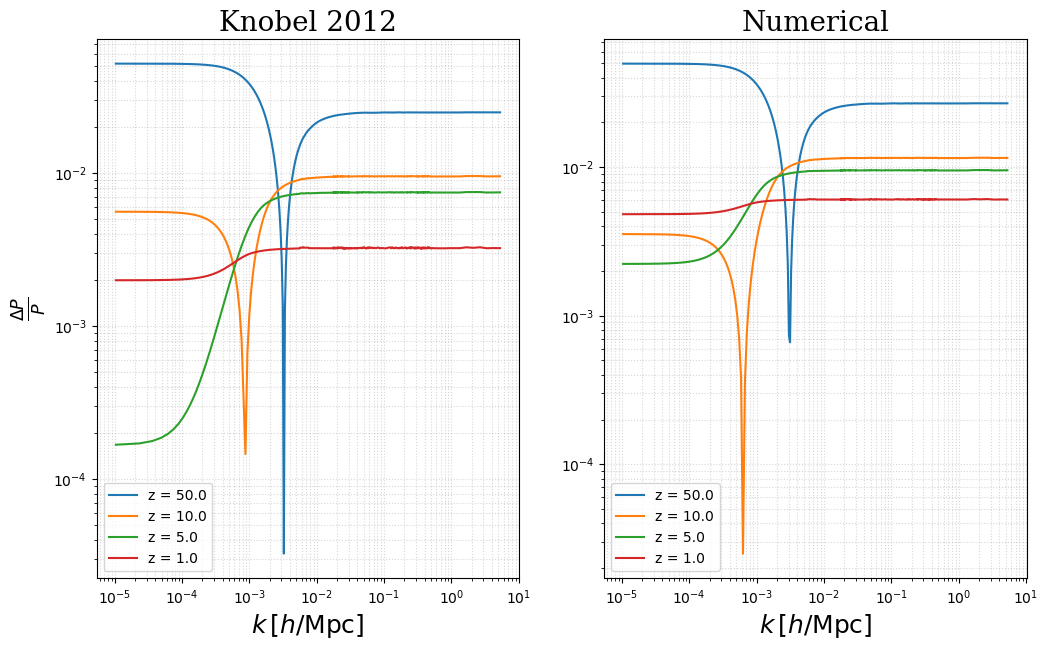

In [7]:

filenames = [
    'TPC1_300_z1_pk.dat',
    'TPC1_300_z2_pk.dat',
    'TPC1_300_z3_pk.dat',
    'TPC1_300_z4_pk.dat',
    'TPC1_300_z5_pk.dat'
]

data_0 = np.loadtxt(filenames[4])
k_0 = data_0[:,0]
pk_0 = data_0[:,1]

plt.figure(figsize=(12, 7))

for fname in filenames[0:4]:
    pattern = re.compile(r'z\s*=\s*([-\d\.]+)', re.IGNORECASE)
    with open(fname, 'r') as f:
        for line in f:
            if line.startswith('#'):
                match = pattern.search(line)
                if match:
                    z_value = float(match.group(1))
                    print("Found z value:", z_value)
                    
    data = np.loadtxt(fname)
    k = data[:, 0]
    pk = data[:, 1]
    
    z_R = z_value
    a_scale = 1/(1+z_R)
    #new_pk = (D_plusN(a_scale)**2) * pk_0
    #new_pk = (D_plusF(z_R)**2) * pk_0
    #ratio = (abs(new_pk-pk))/pk

    plt.subplot(1, 2, 1)
    new_pk1 = (D_plusF(z_R)**2) * pk_0
    ratio1 = (abs(new_pk1-pk))/pk
    plt.loglog(k, ratio1, label=f'z = {z_value}')
    plt.xlabel(r'$k \, [h/\mathrm{Mpc}]$', style = 'normal', family = 'serif', size = 18)
    plt.ylabel(r'$\frac{\Delta P}{P}$', style = 'normal', family = 'serif', size = 18)
    plt.legend()
    plt.grid(True, which='both', ls=':', alpha=0.5)
    plt.title(r'Knobel 2012', style = 'normal', family = 'serif', size = 20)

    plt.subplot(1, 2, 2)
    new_pk2 = (D_plusN(a_scale)**2) * pk_0
    ratio2 = (abs(new_pk2-pk))/pk
    plt.loglog(k, ratio2, label=f'z = {z_value}')
    plt.xlabel(r'$k \, [h/\mathrm{Mpc}]$', style = 'normal', family = 'serif', size = 18)
    plt.legend()
    plt.grid(True, which='both', ls=':', alpha=0.5)
    plt.title(r'Numerical', style = 'normal', family = 'serif', size = 20)
plt.savefig('MPS_ratios', bbox_inches='tight', transparent=True,dpi=200)
plt.show()

# Ejercicio #6

## Función de correlación

In [8]:
filenames = [
    'TPC1_4Ob100_pk.dat',
    'TPC1_4Ob200_pk.dat',
    'TPC1_4Ob300_pk.dat'
]

w_c = 0.120
w_b = 0.0224
w_nu = 6.57e-4

def r_drag(c,b,n):
    exp = np.e**(-72.3 * (n+0.0006)**2)
    N = exp * 55.154
    D = ((c+b)**0.25351) * (b**0.12807)
    return N/D



def corr_func(name):
    filename = name
    df = pd.read_csv(filename, delim_whitespace=True, header=None, names=['k', 'Pk'], skiprows = 4)
    #print(df.head())
    
    k_values = df['k']
    P_k = df['Pk']
    P_k_interp = interp1d(k_values, P_k, kind='cubic', fill_value="extrapolate")
    
    pi = np.pi
    pi2 = pi * 2
    twopi2 = 2 * pi2
    Nkpoints = 2000
    kmin = max(0.00001, k_values[0])
    kmax = min(20, k_values.iloc[-1])
    dk = (np.log10(kmax) - np.log10(kmin)) / Nkpoints
    kT = np.logspace(np.log10(kmin), np.log10(kmax), Nkpoints)

    R0 = 1
    def W(k): return np.exp(-(R0 * k)**2 / 2)
    
    r_values = np.linspace(1, 150, 150)
    xi_r = []
    
    for r in r_values:
        xi_0 = kmin**3 * P_k_interp(kmin) * spherical_jn(0, kmin * r) * W(kmin)
        for k in kT[1:]:
            j0 = np.sin(k * r) / (k * r)
            delt_k = np.log(k / kT[0]) / Nkpoints
            xi_0 += k**3 * P_k_interp(k) * j0 * W(k) * delt_k
        xi_r.append(xi_0 / twopi2)
    
    x_data = np.array(r_values/0.69)
    y_data = np.array(np.array(r_values)**2 * np.array(xi_r))
    return [x_data,y_data]
    
cor_co = ['#4C934C','#1C448E','#ff7904']

In [9]:
def maximos(x,y):
    dy = np.zeros_like(y)
    dx = x[1] - x[0]  # asumiendo espaciamiento uniforme
    dy[1:-1] = (y[2:] - y[:-2]) / (2*dx)
    max_indices = []
    for i in range(1, len(dy)-1):
        # Verificamos el cambio de signo de la derivada
        if dy[i] > 0 and dy[i+1] < 0:
            max_indices.append(i)
    
    print("Índices de máximos locales encontrados:", max_indices)
    print("Coordenadas (x, y) de los picos:")
    for idx in max_indices:
        print(f"x = {x[idx]:.3f}, y = {y[idx]:.3f}")

maximos(corr_func(filenames[0])[0],corr_func(filenames[0])[1])
r_drag(w_c,0.022,w_nu)

/tmp/ipykernel_13220/2361744989.py:21: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(filename, delim_whitespace=True, header=None, names=['k', 'Pk'], skiprows = 4)
/tmp/ipykernel_13220/2361744989.py:21: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(filename, delim_whitespace=True, header=None, names=['k', 'Pk'], skiprows = 4)


Índices de máximos locales encontrados: [12, 101]
Coordenadas (x, y) de los picos:
x = 18.841, y = 40.294
x = 147.826, y = 16.261


147.4744248607944

/tmp/ipykernel_13220/2361744989.py:21: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(filename, delim_whitespace=True, header=None, names=['k', 'Pk'], skiprows = 4)
/tmp/ipykernel_13220/2361744989.py:21: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(filename, delim_whitespace=True, header=None, names=['k', 'Pk'], skiprows = 4)
/tmp/ipykernel_13220/2361744989.py:21: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(filename, delim_whitespace=True, header=None, names=['k', 'Pk'], skiprows = 4)
/tmp/ipykernel_13220/2361744989.py:21: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``se

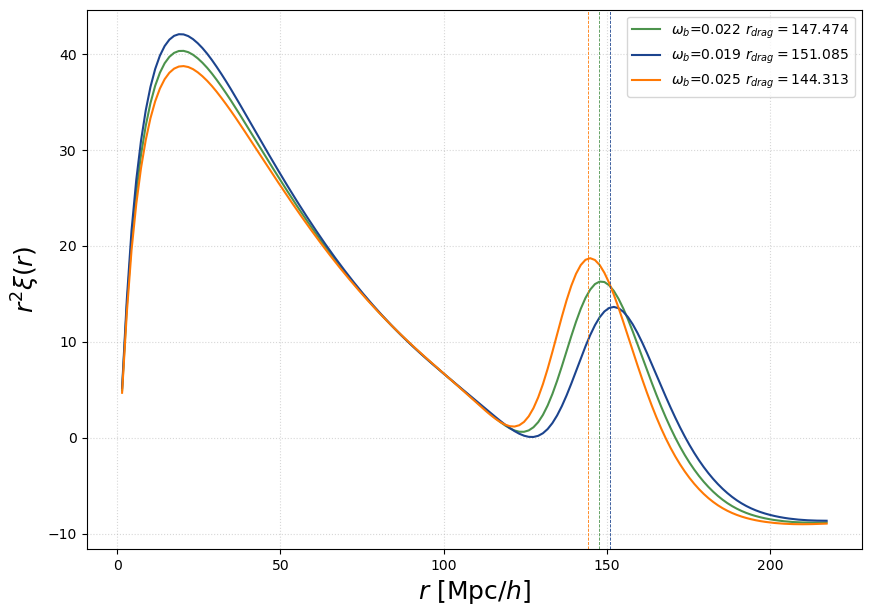

In [10]:
plt.figure(figsize=(10, 7))
plt.plot(corr_func(filenames[0])[0],corr_func(filenames[0])[1], label = r'$\omega_b$=0.022 $r_{drag}=$'+f'{r_drag(w_c,0.022,w_nu):.3f}', color = cor_co[0])
plt.plot(corr_func(filenames[1])[0],corr_func(filenames[1])[1], label = r'$\omega_b$=0.019 $r_{drag}=$'+f'{r_drag(w_c,0.019,w_nu):.3f}', color = cor_co[1])
plt.plot(corr_func(filenames[2])[0],corr_func(filenames[2])[1], label = r'$\omega_b$=0.025 $r_{drag}=$'+f'{r_drag(w_c,0.025,w_nu):.3f}', color = cor_co[2])
plt.axvline(r_drag(w_c,0.022,w_nu), color=cor_co[0], linestyle='--', linewidth=0.6)
plt.axvline(r_drag(w_c,0.019,w_nu), color=cor_co[1], linestyle='--', linewidth=0.6)
plt.axvline(r_drag(w_c,0.025,w_nu), color=cor_co[2], linestyle='--', linewidth=0.6)
plt.legend()
plt.xlabel(r'$r \ [\mathrm{Mpc}/h]$', style = 'normal', family = 'serif', size = 18)
plt.ylabel(r'$r^2 \xi(r)$', style = 'normal', family = 'serif', size = 18)
plt.grid(True, which='both', ls=':', alpha=0.5)
plt.savefig('Corr_func', bbox_inches='tight', transparent=True,dpi=200)